In [2]:
!conda install fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
# !pip install fastai==2.2.7
import fastai
from fastai import *
fastai.__version__
# !-f https://download.pytorch.org/whl/torch_stable.html
# !pip install torch==1.8.1+cpu 
# !pip install torchvision==0.9.1+cpu
# !pip install fastai>=2.3.1
# !pip install ipywidgets
# !pip install voila

'2.5.3'

In [4]:
from fastai.vision.all import *

In [6]:
!python --version

In [10]:
# path = Path('gdrive/MyDrive/Colab Notebooks/Cupboard/fruitveg81')
path = Path('C:/Users/nineve/Dropbox/TechLabs/Cupboard/wt21-cupboard-drone/camera_feature/dataset_grocerystore')

In [11]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('Fruit'),Path('Vegetables')]

In [12]:
fns = get_image_files(path)
fns

(#1776) [Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_001.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_002.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_003.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_004.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_005.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_006.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_007.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_008.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_009.jpg'),Path('Fruit/Apple/Golden-Delicious/Golden-Delicious_010.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
fruitveg = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.5))

In [15]:
dls = fruitveg.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\nineve\anaconda3\envs\fastai\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


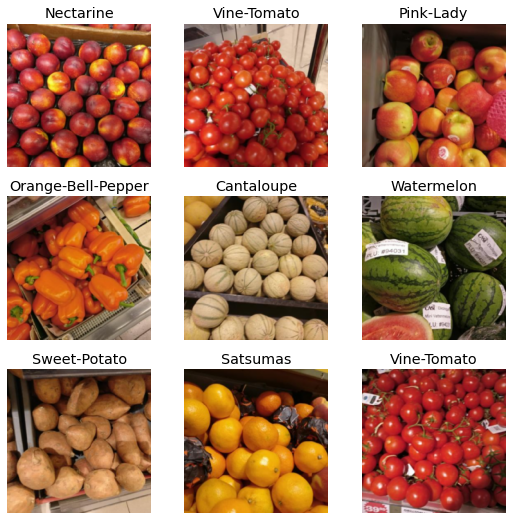

In [16]:
dls.valid.show_batch(max_n=9, nrows=3)

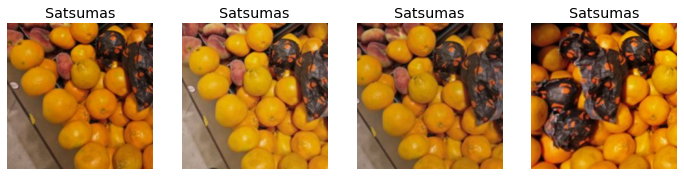

In [17]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\nineve/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,4.490351,1.547211,0.411268,06:13


epoch,train_loss,valid_loss,error_rate,time
0,1.787792,0.713725,0.185915,07:54
1,1.122579,0.322313,0.095775,07:45
2,0.735248,0.211451,0.059155,07:54
3,0.531042,0.200501,0.050704,07:50


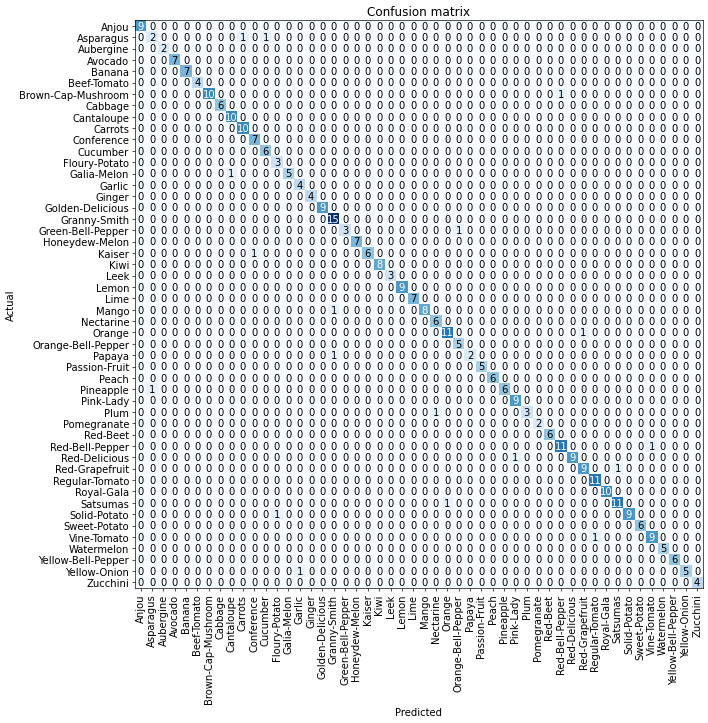

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=1)

[('Asparagus', 'Carrots', 1),
 ('Asparagus', 'Cucumber', 1),
 ('Brown-Cap-Mushroom', 'Red-Bell-Pepper', 1),
 ('Galia-Melon', 'Cantaloupe', 1),
 ('Green-Bell-Pepper', 'Orange-Bell-Pepper', 1),
 ('Kaiser', 'Conference', 1),
 ('Mango', 'Granny-Smith', 1),
 ('Orange', 'Red-Grapefruit', 1),
 ('Papaya', 'Granny-Smith', 1),
 ('Pineapple', 'Asparagus', 1),
 ('Plum', 'Nectarine', 1),
 ('Red-Bell-Pepper', 'Vine-Tomato', 1),
 ('Red-Delicious', 'Pink-Lady', 1),
 ('Red-Grapefruit', 'Satsumas', 1),
 ('Satsumas', 'Orange', 1),
 ('Solid-Potato', 'Floury-Potato', 1),
 ('Vine-Tomato', 'Regular-Tomato', 1),
 ('Yellow-Onion', 'Garlic', 1)]

In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [25]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict(path/'img-4.jpg')

('Garlic',
 TensorBase(14),
 TensorBase([6.3242e-05, 1.0178e-04, 9.2493e-06, 1.1814e-05, 1.8485e-04, 1.4216e-04, 7.7175e-05, 1.7705e-02, 7.6449e-05, 1.7466e-04, 3.8350e-06, 7.1005e-04, 7.4042e-05, 3.3515e-05, 9.5006e-01, 1.2816e-02,
         3.9704e-06, 5.4016e-06, 1.4198e-05, 1.1615e-04, 1.3146e-05, 2.7878e-05, 1.4999e-02, 4.3929e-05, 7.6582e-06, 3.1432e-06, 5.8162e-06, 8.9090e-05, 4.5751e-05, 8.1770e-06, 4.8754e-06, 8.8273e-05,
         1.4032e-04, 4.2151e-05, 3.2510e-05, 3.5726e-05, 5.0892e-04, 3.1016e-04, 2.8327e-06, 2.7071e-06, 2.3756e-04, 3.4253e-06, 1.0170e-06, 3.5038e-05, 1.5631e-05, 2.9105e-06, 2.3065e-06, 4.9909e-04,
         3.8872e-04, 1.6585e-05]))

In [28]:
learn_inf.dls.vocab

['Anjou', 'Asparagus', 'Aubergine', 'Avocado', 'Banana', 'Beef-Tomato', 'Brown-Cap-Mushroom', 'Cabbage', 'Cantaloupe', 'Carrots', 'Conference', 'Cucumber', 'Floury-Potato', 'Galia-Melon', 'Garlic', 'Ginger', 'Golden-Delicious', 'Granny-Smith', 'Green-Bell-Pepper', 'Honeydew-Melon', 'Kaiser', 'Kiwi', 'Leek', 'Lemon', 'Lime', 'Mango', 'Nectarine', 'Orange', 'Orange-Bell-Pepper', 'Papaya', 'Passion-Fruit', 'Peach', 'Pineapple', 'Pink-Lady', 'Plum', 'Pomegranate', 'Red-Beet', 'Red-Bell-Pepper', 'Red-Delicious', 'Red-Grapefruit', 'Regular-Tomato', 'Royal-Gala', 'Satsumas', 'Solid-Potato', 'Sweet-Potato', 'Vine-Tomato', 'Watermelon', 'Yellow-Bell-Pepper', 'Yellow-Onion', 'Zucchini']

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Garlic; Probability: 0.9501')